In [1]:
import pickle
import seaborn as sns

In [2]:
with open("measure-barzur.pkl", "rb") as pkl:
    load = pickle.load(pkl)
    their = load["their"]
    our = load["our"]
    data = load["data"]

print("their:", their["model"], their["mdp"], sep="\n")
print()
print("our:", our["model"], our["mdp"], sep="\n")
data

their:
barzur20aft.Bitcoin(alpha=0.125, gamma=0.25, maximum_fork_length=7)
MDP of size 139 / 4 / 504 / 3.6

our:
sm.SelfishMining(Bitcoin(), alpha=0.125, gamma=0.25, maximum_height=7, maximum_size=0, force_consider_own=True)
MDP of size 9335 / 3 / 42068 / 4.5


,alpha,gamma,horizon,value_eps,model,start_value,iter,time
0,0.25,1.0,200,0.01,their,62.089675,1205,0.377844
1,0.25,1.0,200,0.01,our,61.664728,1240,35.655500
2,0.05,1.0,50,0.01,their,1.634364,99,0.032636
3,0.05,1.0,50,0.01,our,1.706095,100,2.864955
4,0.15,1.0,200,0.01,their,31.027768,905,0.306089
...,...,...,...,...,...,...,...,...
175,0.35,0.5,200,0.01,our,78.885378,1400,33.594365
176,0.45,1.0,100,0.01,their,72.668541,814,0.365552
177,0.45,1.0,100,0.01,our,71.513032,893,23.964264
178,0.30,0.5,50,0.01,their,15.186046,288,0.119658


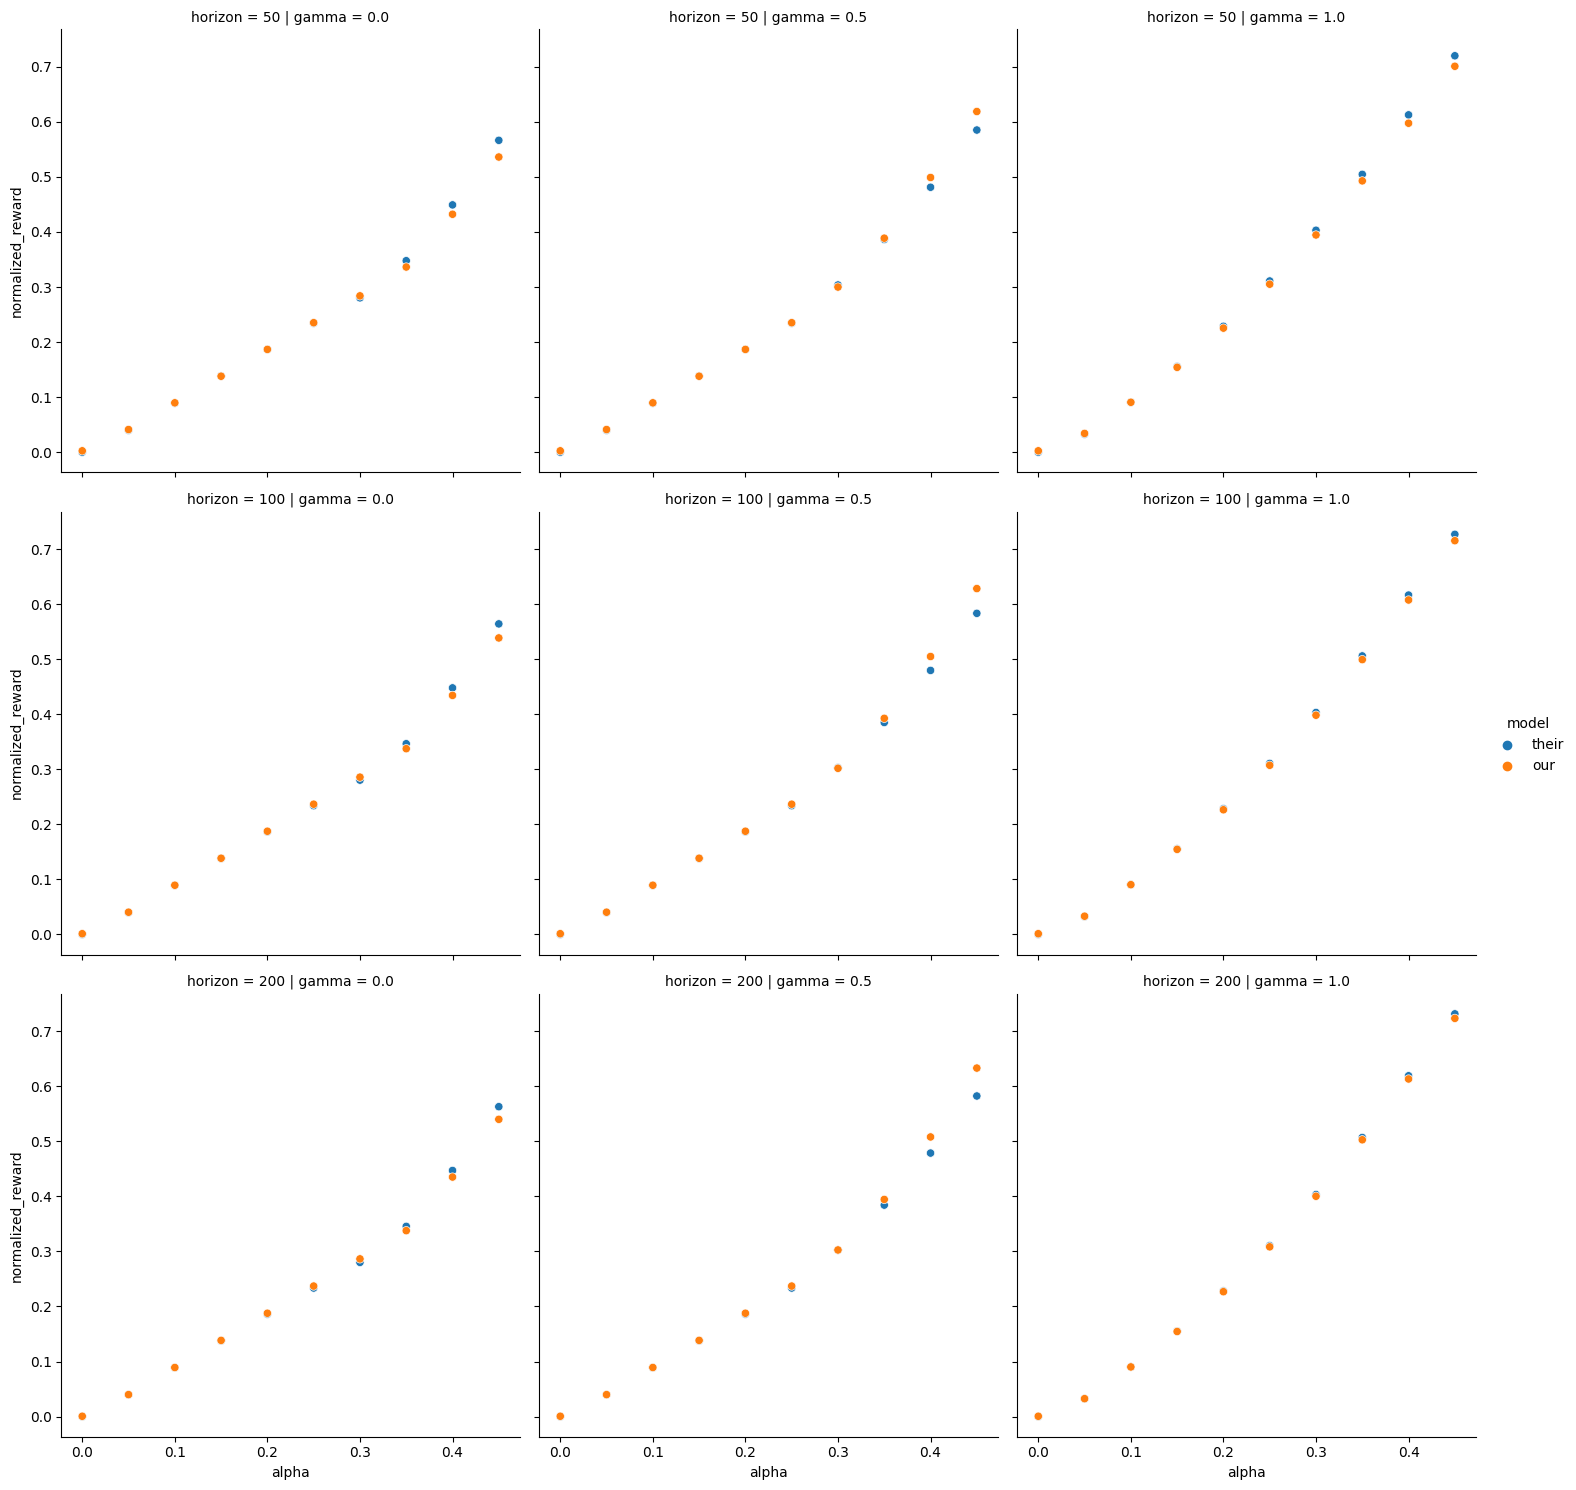

In [3]:
# Compare model w.r.t. reward
sns.relplot(
    data.assign(normalized_reward=lambda x: x.start_value / x.horizon),
    x="alpha",
    y="normalized_reward",
    col="gamma",
    row="horizon",
    hue="model",
)

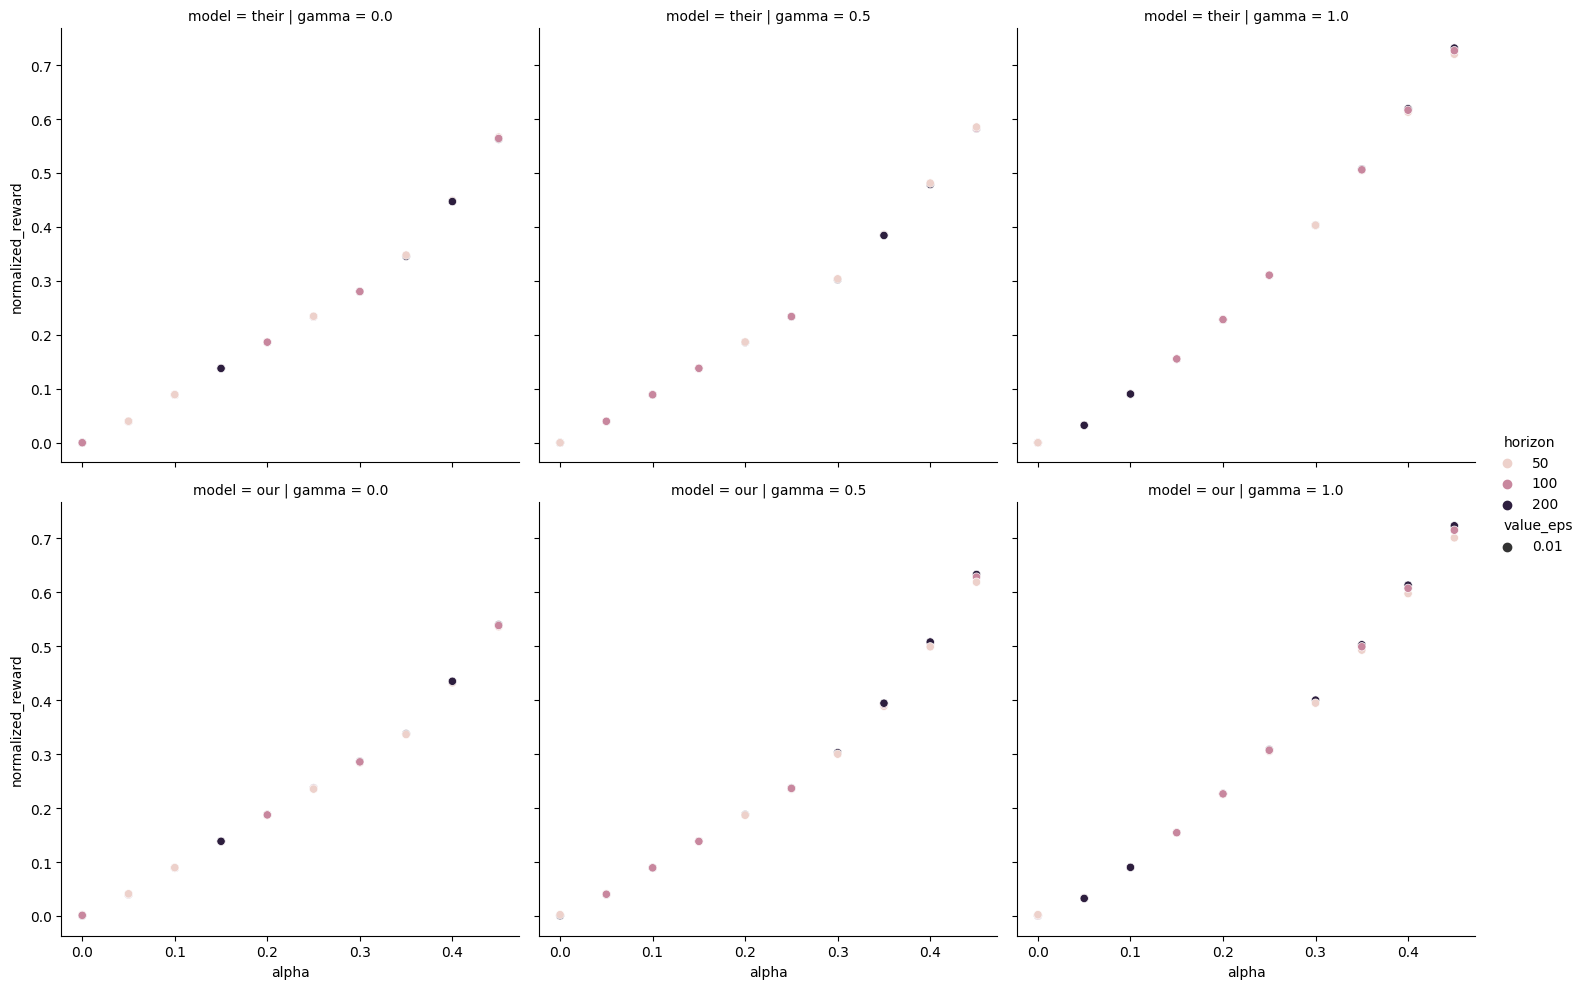

In [4]:
# Demonstrate effect of horizon
sns.relplot(
    data.assign(normalized_reward=lambda x: x.start_value / x.horizon),
    x="alpha",
    y="normalized_reward",
    col="gamma",
    row="model",
    hue="horizon",
    style="value_eps",
)

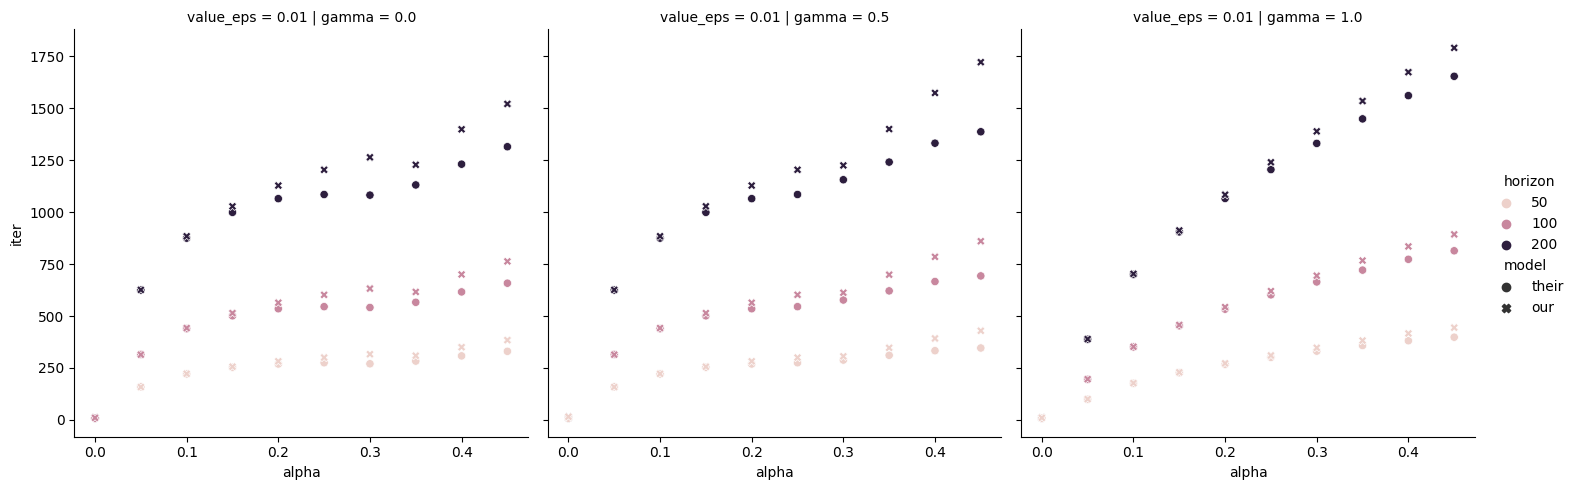

In [5]:
# Visualize number iterations required in value iteration
# It's intersting that the models behave so similar!
sns.relplot(
    data,
    x="alpha",
    y="iter",
    col="gamma",
    hue="horizon",
    row="value_eps",
    style="model",
)

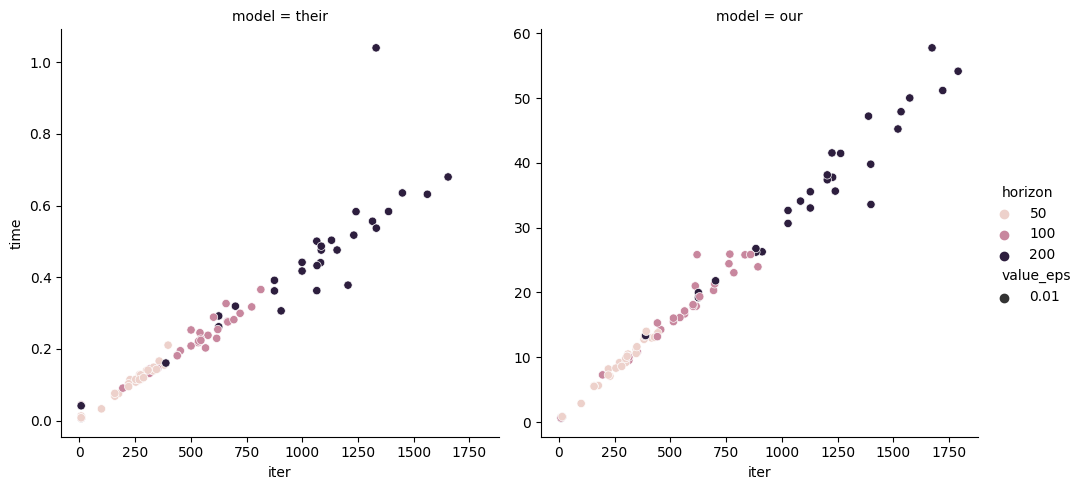

In [6]:
# Visualize solving time
# Naturally, the smaller model can be iterated much faster
sns.relplot(
    data,
    x="iter",
    y="time",
    hue="horizon",
    style="value_eps",
    col="model",
    facet_kws=dict(sharey=False),
)